# Insurance claim fraud detection

### Data description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this project, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('insurance_claim.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We can check all the columns here. fraud_reported is our target column.

In [5]:
print(df.nunique())

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

policy number and incident location have different values for all records. _c39 column has no records.

There are certain columns in the dataset which play no part in model building, also there is a column which has no values present. We need to drop them.

In [6]:
df.drop(['policy_number','policy_bind_date','insured_zip','incident_date','incident_location','auto_year','_c39'], axis=1, inplace= True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,N


## EDA

In [7]:
df.shape

(1000, 33)

Now, in the dataset we have 1000 rows and 33 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

All the columns have equal number of count. Data here belong to integer and object type data.

In [9]:
# checking null values.

df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

We see no null values in the data set. lets visualize it.

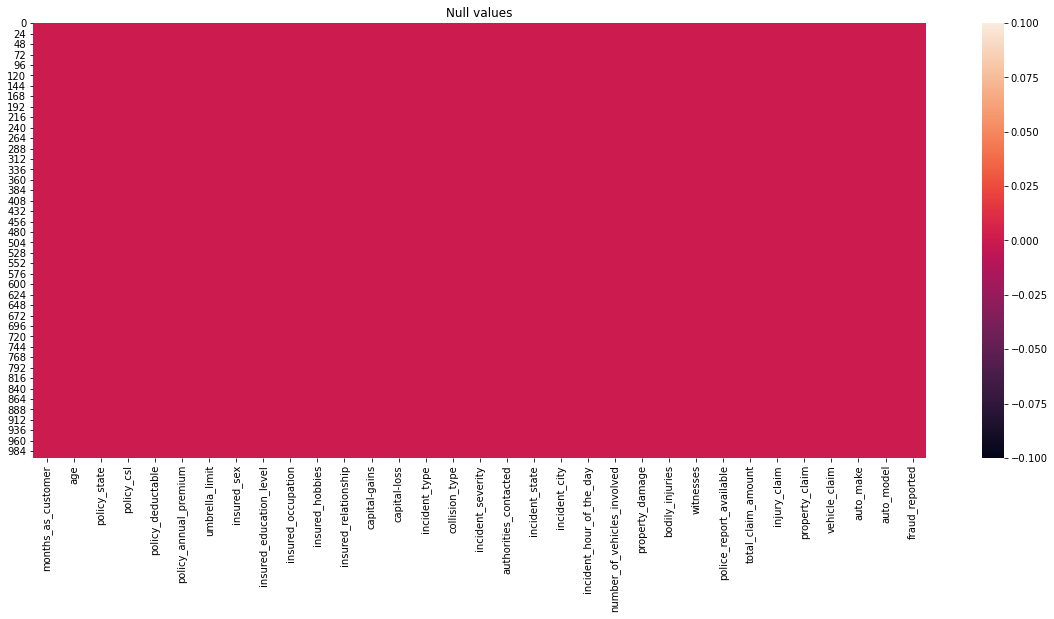

In [10]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see no null values present.

In [11]:
# Lets check the unique values

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

Here we can see certain columns have '?' in their records.

In [12]:
df[(df['collision_type'] == "?")]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N
13,121,34,OH,100/300,1000,936.61,0,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,Parked Car,?,Minor Damage,None,SC,Springfield,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,N
26,257,43,IN,100/300,2000,1322.10,0,MALE,High School,prof-specialty,golf,own-child,0,-29200,Parked Car,?,Minor Damage,Police,PA,Arlington,4,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,N
27,202,34,IN,100/300,500,848.07,3000000,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,Vehicle Theft,?,Minor Damage,None,VA,Northbrook,5,1,YES,2,1,?,5720,1040,520,4160,Suburu,Forrestor,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,IN,500/1000,1000,1200.33,4000000,FEMALE,High School,craft-repair,cross-fit,own-child,0,-36400,Vehicle Theft,?,Minor Damage,Police,WV,Springfield,7,1,?,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,Y
969,398,55,OH,250/500,500,862.19,0,MALE,High School,adm-clerical,movies,unmarried,69400,0,Vehicle Theft,?,Trivial Damage,Police,SC,Northbend,7,1,?,2,3,?,6600,600,1200,4800,Accura,MDX,N
983,17,39,IL,250/500,1000,840.95,0,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,Parked Car,?,Trivial Damage,Police,SC,Arlington,9,1,?,2,1,?,3440,430,430,2580,Suburu,Legacy,N
994,141,30,IN,500/1000,1000,1347.04,0,MALE,High School,sales,bungie-jumping,own-child,0,-82100,Parked Car,?,Minor Damage,None,SC,Northbend,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,N


We can see collision type is '?' only when there are cases of theft or parked car, as there can be no collisions in these cases.

In [13]:
# replacing ? with 'no_collision'

df['collision_type']= df['collision_type'].replace("?", "no_collision")

In [14]:
df[(df['property_damage'] == "?")]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,no_collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,Y
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,N
7,165,37,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,N
16,70,26,OH,500/1000,1000,1199.44,5000000,MALE,College,machine-op-inspct,hiking,own-child,63600,0,Multi-vehicle Collision,Rear Collision,Major Damage,Other,NY,Riverwood,0,3,?,1,2,YES,52110,5790,5790,40530,Nissan,Maxima,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,OH,250/500,1000,1235.14,0,MALE,MD,exec-managerial,camping,husband,0,-32100,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,N
994,141,30,IN,500/1000,1000,1347.04,0,MALE,High School,sales,bungie-jumping,own-child,0,-82100,Parked Car,no_collision,Minor Damage,None,SC,Northbend,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,N


We can see nearly half of the records have '?' in their data. so we can replace it with a new record.

In [15]:
df['property_damage']= df['property_damage'].replace("?", "Unknown")

In [16]:
df[df['police_report_available']=='?']

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,no_collision,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,?,5070,780,780,3510,Mercedes,E400,Y
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,Unknown,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,N
9,212,42,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,N
10,235,42,OH,100/300,500,1253.12,4000000,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,22,1,YES,2,2,?,87010,7910,15820,63280,Ford,F150,N
20,460,62,IN,250/500,1000,1187.96,4000000,MALE,JD,other-service,bungie-jumping,own-child,0,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,20,3,NO,1,0,?,47160,0,5240,41920,Suburu,Impreza,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,IN,250/500,1000,1248.05,0,FEMALE,High School,exec-managerial,movies,husband,37500,-54000,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,3,3,YES,1,2,?,53280,5920,0,47360,Chevrolet,Malibu,N
993,124,28,OH,250/500,1000,1235.14,0,MALE,MD,exec-managerial,camping,husband,0,-32100,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,Unknown,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,N
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N


Here also, nearly half of the records contain '?', we replace it with a new record.

In [17]:
df['police_report_available']= df['police_report_available'].replace('?','Unknown')

In [18]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


We can check the distribution of the continious numeric data. Here the difference between the mean and median is less in the columns except for 
umbrella limit and capital gain, so the data excluding this two should be normally distributed. Also the difference between the mean and the maximum
 is not very high in the columns, except for capital loss, so the data other than this column should be less prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

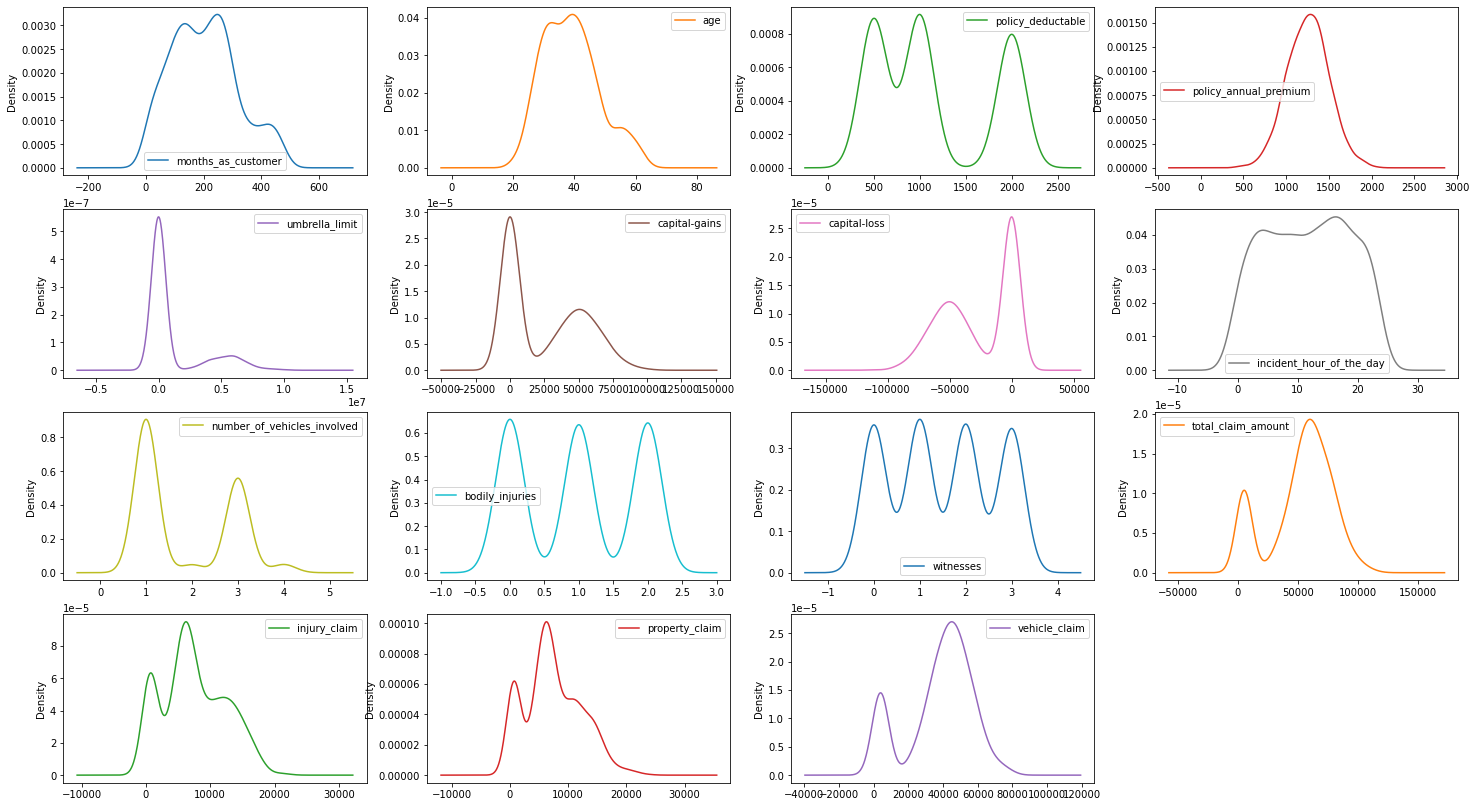

In [19]:
df.plot(kind='density', subplots= True, layout=(5,4),sharex=False, legend=True, figsize=[25,18])
plt.show

We can check the distribution of the numeric columns. lets check closely.

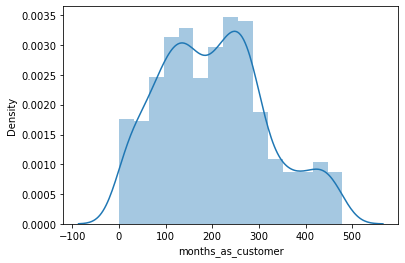

In [20]:
sns.distplot(df['months_as_customer']);

data can be seen having some variance present. no skewness can be seen.

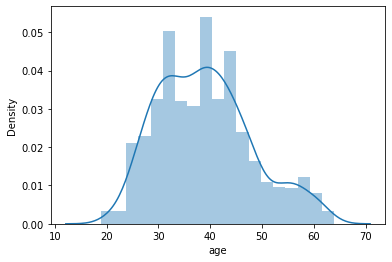

In [21]:
sns.distplot(df['age']);

Here the distribution has little variance.

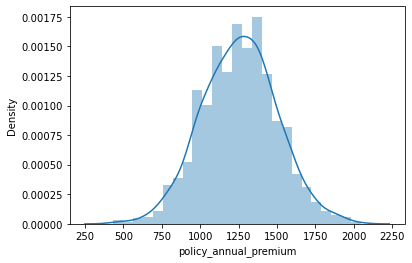

In [22]:
sns.distplot(df['policy_annual_premium']);

Here the data is normally distributed, near to a bell shaped curve.

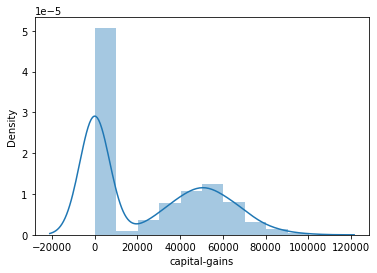

In [23]:
sns.distplot(df['capital-gains']);

Here data has variance present and also some skewness. with most of the values being '0'

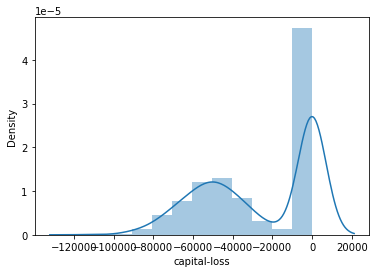

In [24]:
sns.distplot(df['capital-loss']);

We can see the distribution is exact opposite of the capital gain, with skewness here being left skewed, and variance present.

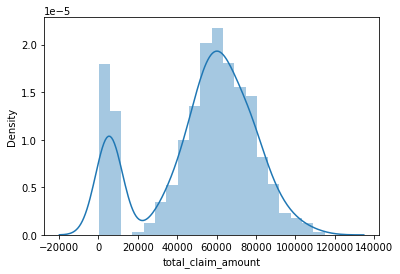

In [25]:
sns.distplot(df['total_claim_amount']);

Data here can be seen having many near 0 values, and a normal distribution after that.

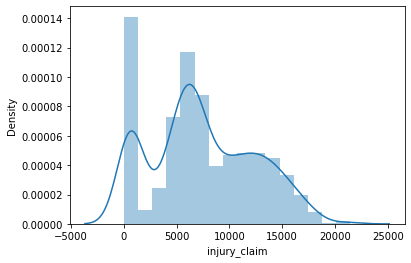

In [26]:
sns.distplot(df['injury_claim']);

Here data has some variance and skewness can be seen, right skewed, many values are 0.

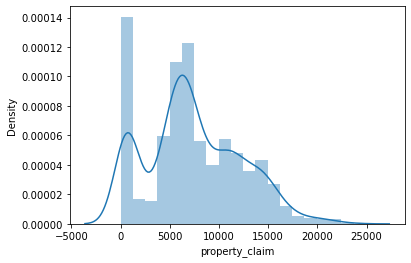

In [27]:
sns.distplot(df['property_claim']);

Data here also has variance and is right tailed skewed.many values are 0.

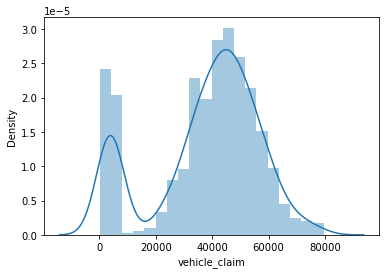

In [28]:
sns.distplot(df['vehicle_claim']);

Data here has near 0 values present and is normally distributed after that.

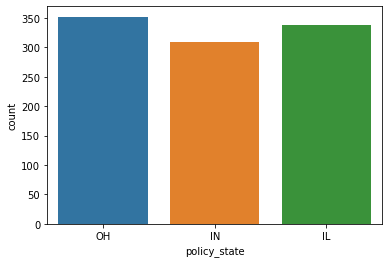

In [29]:
sns.countplot(df['policy_state']);

Here policy state are nearly same for all categories.

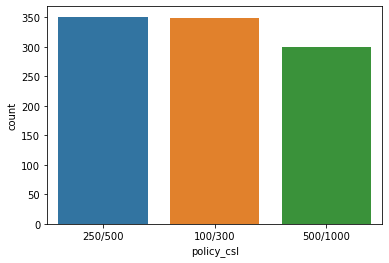

In [30]:
sns.countplot(df['policy_csl']);

policy_csl is also nearly same for all categories, with 500/1000 being slightly less comparatively.

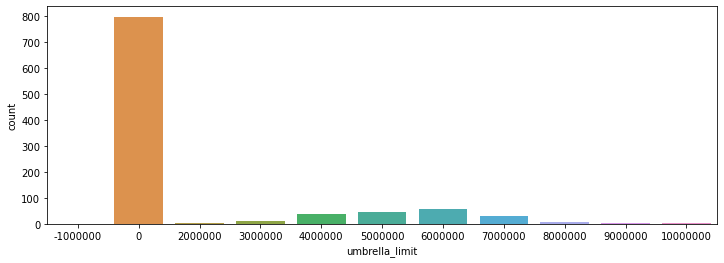

In [31]:
plt.figure(figsize=[12,4])
sns.countplot(df['umbrella_limit'])
plt.show()

Majority of the umbrella limit values are 0. with 60 lakh being the highest among the rest.

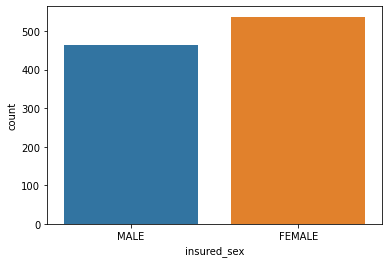

In [32]:
sns.countplot(df['insured_sex']);

Majority of the insured persons are female.

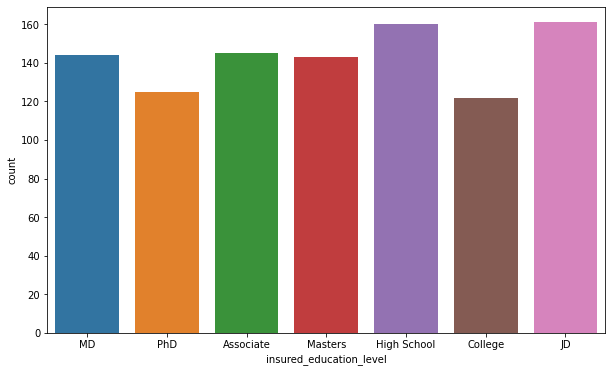

In [33]:
plt.figure(figsize=[10,6])
sns.countplot(df['insured_education_level'])
plt.show()

Education category have nearly same people in all categories. with education level of high school and jd being the top.

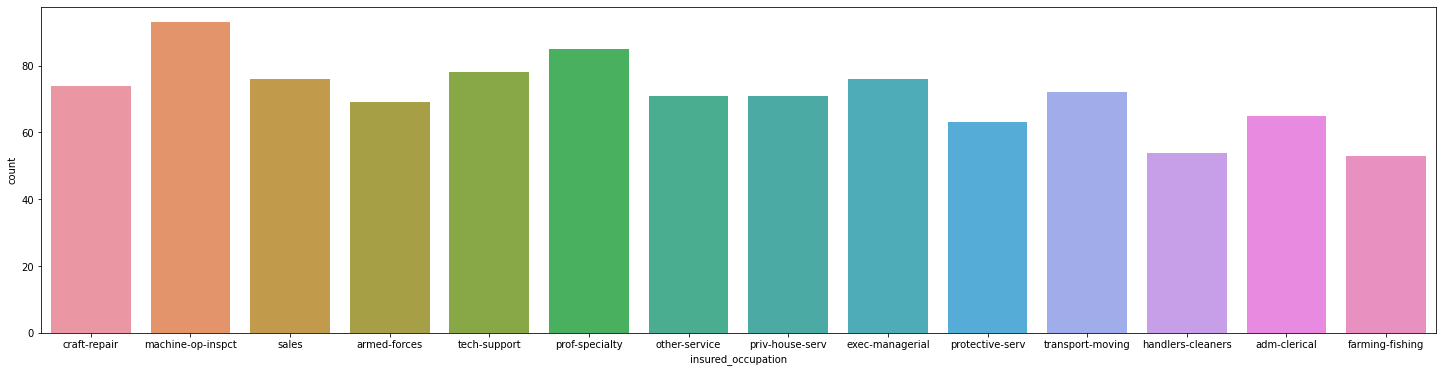

In [34]:
plt.figure(figsize=[25,6])
sns.countplot(df['insured_occupation'])
plt.show()

We can see occupations of the insured persons having equal distribution among the people.

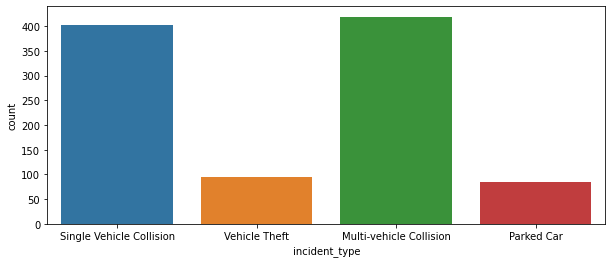

In [35]:
plt.figure(figsize=[10,4])
sns.countplot(df['incident_type'])
plt.show()

We can see most of the incidents are of collision, with multi-vehicle collision being the most.

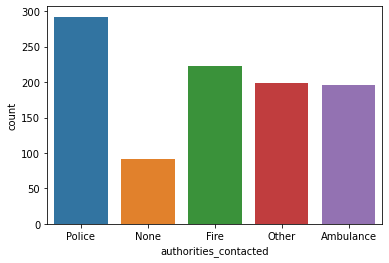

In [36]:
sns.countplot(df['authorities_contacted']);

After incidents, majority of peole contacted the police , followed by fire department.

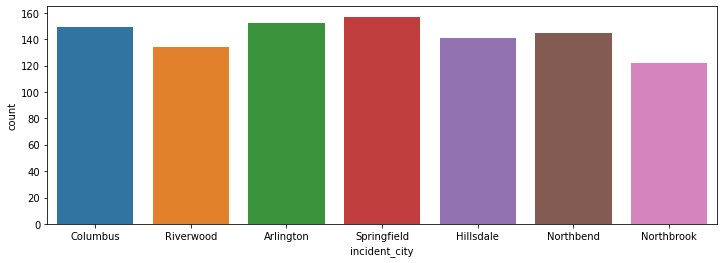

In [37]:
plt.figure(figsize=[12,4])
sns.countplot(df['incident_city'])
plt.show()

Incidents occuring are nearly equal for all the cities.

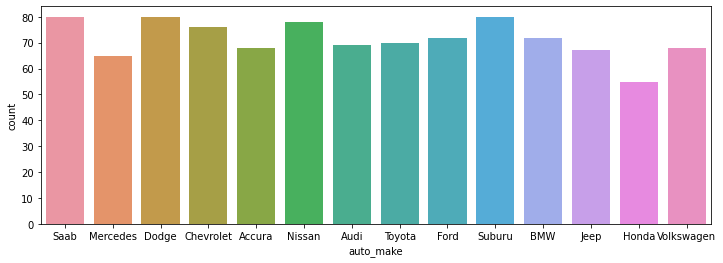

In [38]:
plt.figure(figsize=[12,4])
sns.countplot(df['auto_make'])
plt.show()

Claims made are nearly the same for all auto makers.

#### Lets check our target class imbalance.

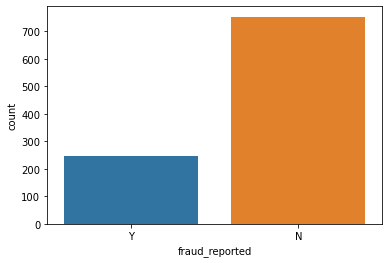

In [39]:
sns.countplot(df['fraud_reported'])

Here we can see some imbalance present, with No being the majority. But the imbalance present is of considerable amount. We need to check the f1 score for accuracy. lets proceed.

## Encoding

In [40]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In the dataset we have many object type data. we need to encode them to proceed.

In [41]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

Some categorical columns are already in encoded form. lets encode the rest.

In [42]:
# encoding nominal data.

cols=['policy_state', 'insured_sex','insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type'
     ,'authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model']

from sklearn.preprocessing import OrdinalEncoder

enc= OrdinalEncoder()

for i in df[cols]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [43]:
# encoding ordinal data.

cols=['policy_csl', 'policy_deductable','umbrella_limit','insured_education_level','incident_severity','fraud_reported']

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()

for i in df[cols]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2.0,1,1,1406.91,1,1.0,4,2.0,17.0,0.0,53300,0,2.0,2.0,0,4.0,4.0,1.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,1
1,228,42,1.0,1,2,1197.22,5,1.0,4,6.0,15.0,2.0,0,0,3.0,3.0,1,4.0,5.0,5.0,8,1,1.0,0,0,1.0,5070,780,780,3510,8.0,12.0,1
2,134,29,2.0,0,2,1413.14,5,0.0,6,11.0,2.0,3.0,35100,0,0.0,1.0,1,4.0,1.0,1.0,7,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,30.0,0
3,256,41,0.0,1,2,1415.74,6,0.0,6,1.0,2.0,4.0,48900,-62400,2.0,0.0,0,4.0,2.0,0.0,5,1,1.0,1,2,0.0,63400,6340,6340,50720,3.0,34.0,1
4,228,44,0.0,2,1,1583.91,6,1.0,0,11.0,2.0,4.0,66000,-46000,3.0,3.0,1,2.0,1.0,0.0,20,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2,1,1310.80,1,0.0,5,2.0,13.0,4.0,0,0,2.0,0.0,1,1.0,0.0,4.0,20,1,2.0,0,1,1.0,87200,17440,8720,61040,6.0,6.0,0
996,285,41,0.0,0,1,1436.79,1,0.0,6,9.0,17.0,5.0,70900,0,2.0,1.0,0,1.0,4.0,3.0,23,1,2.0,2,3,1.0,108480,18080,18080,72320,13.0,28.0,0
997,130,34,2.0,1,0,1383.49,3,0.0,5,1.0,3.0,2.0,35100,0,0.0,2.0,1,4.0,0.0,0.0,4,3,1.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,0
998,458,62,0.0,2,2,1356.92,5,1.0,0,5.0,0.0,5.0,0,0,2.0,1.0,0,3.0,1.0,0.0,2,1,1.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,0


In [45]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                    float64
insured_education_level          int32
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity                int32
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

The dataset is now encoded.

### Checking correlation

In [46]:
cor= df.corr()
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.018481,0.005018,0.017800,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.082966,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.002309,-0.010162,0.058383,-0.055712,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.020561,0.014404,0.021924,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.086068,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.004365,-0.015679,0.052359,-0.049797,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.008213,0.012455,-0.031793,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.037564,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.023346,0.013384,0.022960,0.046682,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.001986,0.023978,0.022779,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.065861,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.019862,-0.000595,0.071500,-0.005252,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.018481,0.020561,0.008213,0.001986,1.000000,0.001624,0.009402,-0.011948,0.012000,-0.053245,-0.006006,-0.025468,0.029668,-0.023106,-0.036759,-0.035281,-0.010001,-0.009862,0.010650,-0.038425,0.066442,0.043148,0.007369,-0.020129,0.074994,0.038323,0.016792,0.034352,0.055172,0.000502,-0.030775,-0.003892,0.007620
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,0.001624,1.000000,-0.007334,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.013508,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.042314,0.026780,0.002332,0.024188,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.017800,0.021924,-0.031793,0.022779,0.009402,-0.007334,1.000000,0.009733,-0.019668,0.024072,-0.037534,0.073487,-0.047318,-0.025566,0.013614,0.040220,0.011335,0.029204,-0.078174,0.013945,-0.024305,-0.019524,-0.072219,0.016680,-0.005779,-0.017330,-0.040896,-0.045625,-0.024954,-0.039004,-0.007169,0.042421,0.057719
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.011948,0.038853,0.009733,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,0.003799,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.016733,-0.020297,0.042463,-0.008846,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.012000,-0.019715,-0.019668,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.053458,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.058611,-0.012072,0.019211,0.052622,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.053245,0.035922,0.024072,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.004076,0.004731,-0.007811,-0.022761,0.000390,-0.018435,-0.015368,-0.039090,-0.000236,-0.014794,-0.032288,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564


Here we can see the correlation between all the columns, lets visualize it.

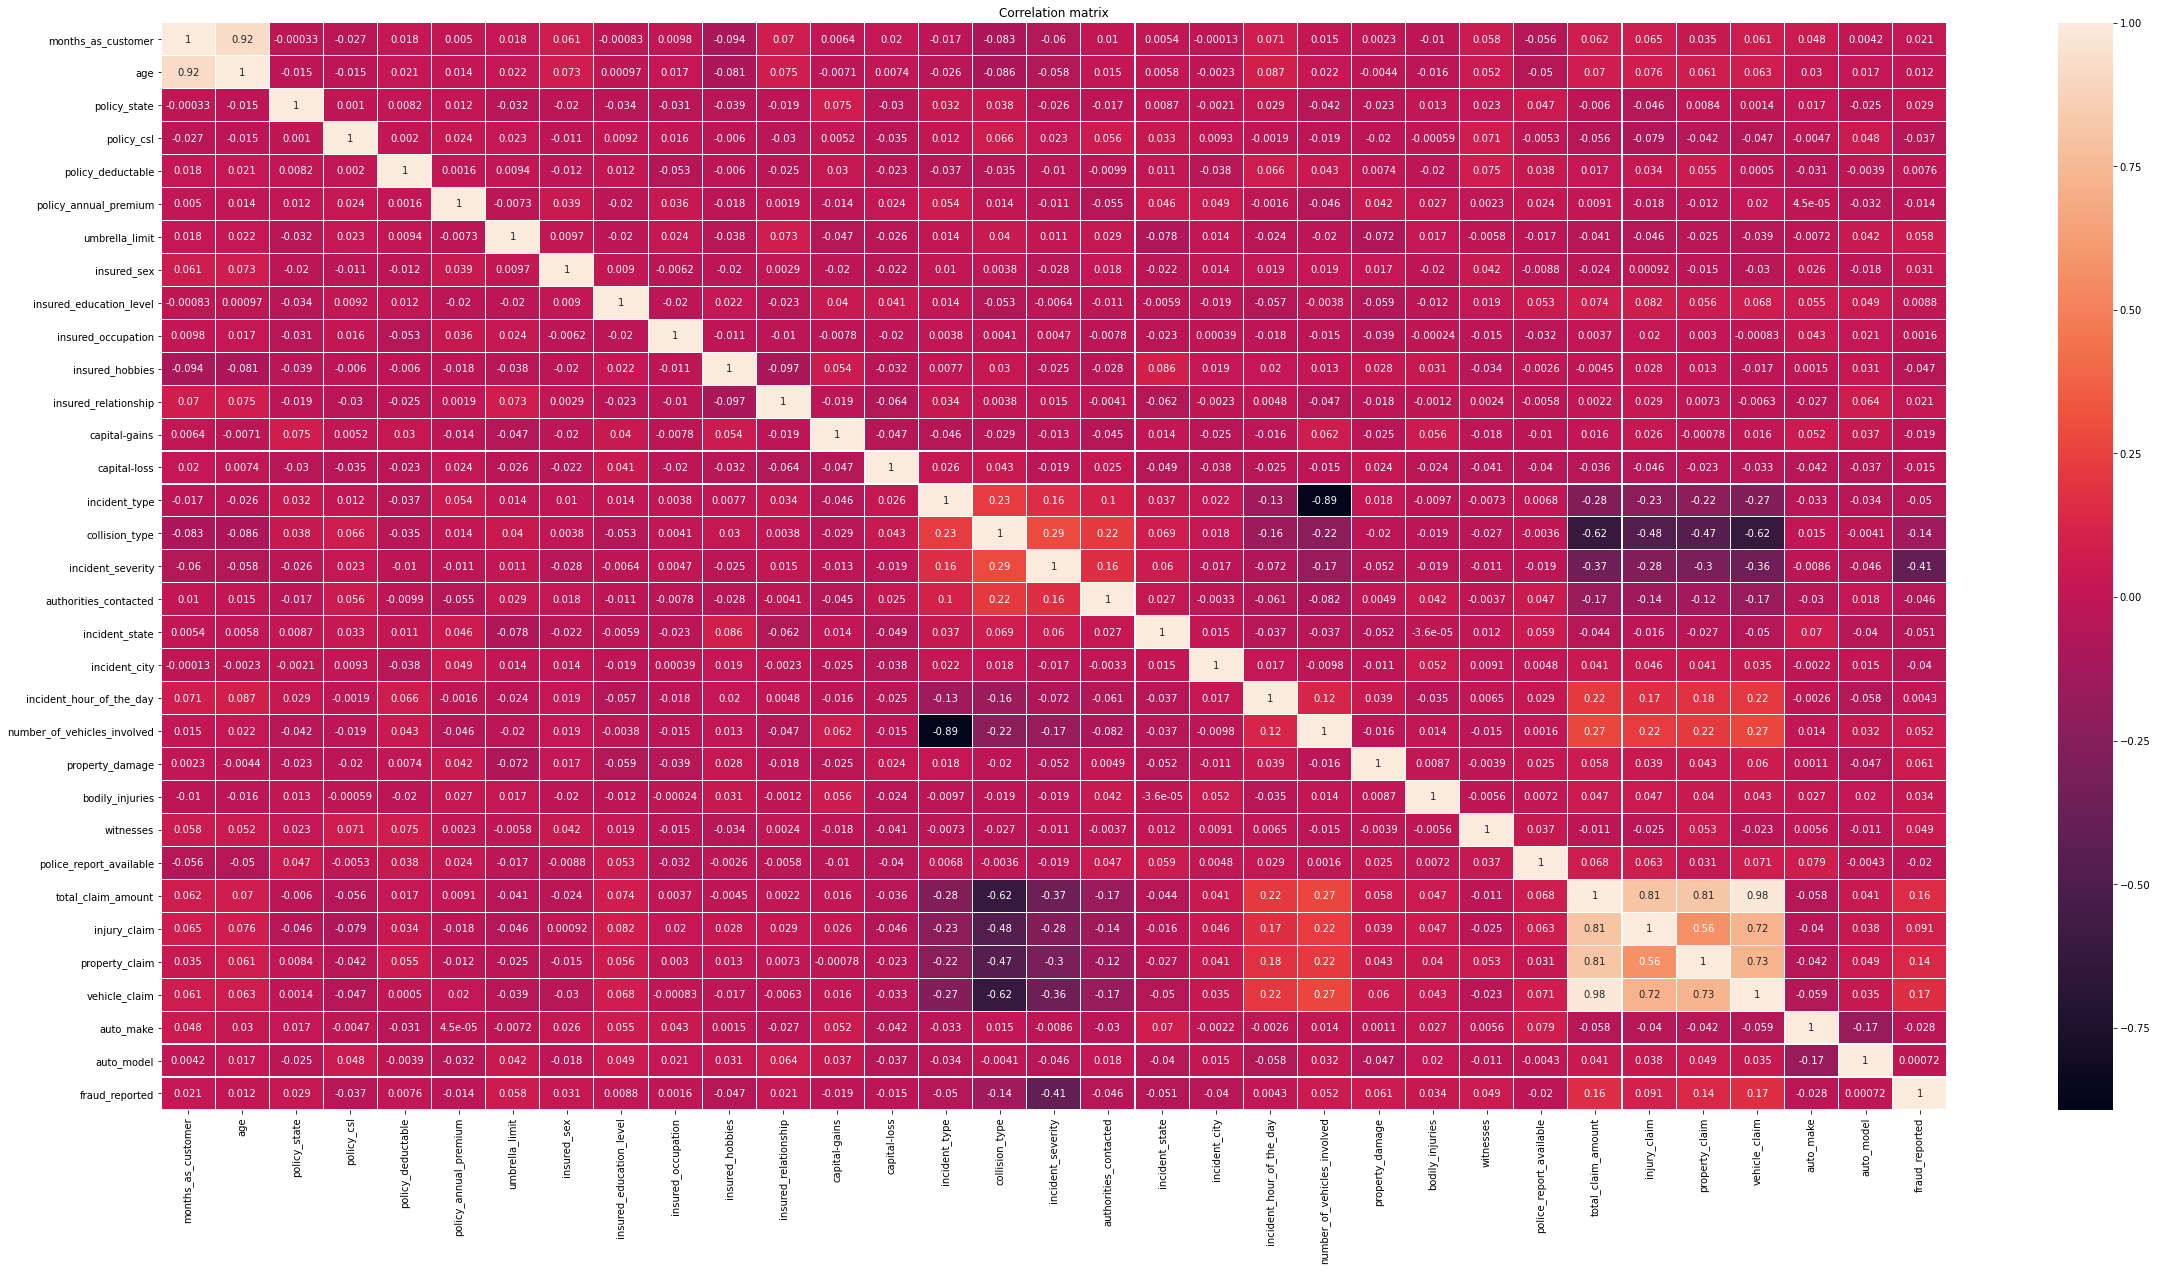

In [47]:
plt.figure(figsize=[40,20])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see very less black color boxes which means negative correlation are less. some very positive correlations can also be seen. Among the independent columns, 'incident type' and 'number of vehicle involved' are showing the most negative relation, on the other hand, 'total claim amount' and 'vehicle claim' have the most positive relation.

In [48]:
# checking correlation of target with independent columns.

cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.060616
umbrella_limit                 0.057719
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
age                            0.012143
insured_education_level        0.008808
policy_deductable              0.007620
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
police_report_available       -0.019571
auto_make                     -0.027519


We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

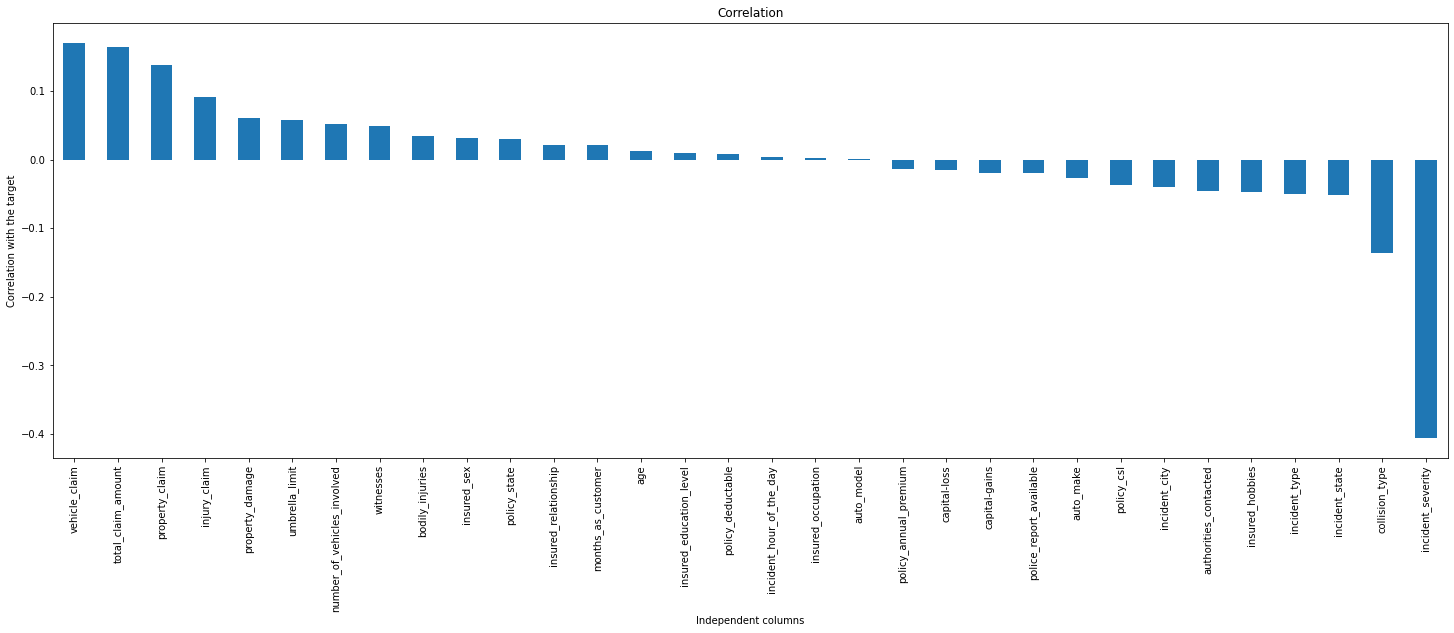

In [49]:
plt.figure(figsize=(25,8))
cor['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Independent columns')
plt.ylabel('Correlation with the target')
plt.title('Correlation')
plt.show()

We can see 'vehicle claim' and 'total claim' having the highest positive correlation with the target and 'incident_severity' having the most negative correlation. 'occupation' and 'auto model' are showing a very less correlation with the target.

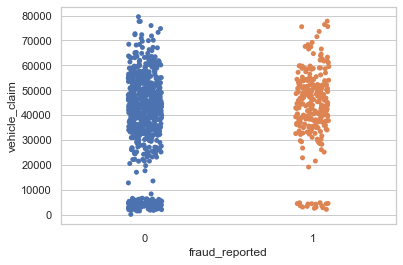

In [50]:
sns.set(style= 'whitegrid')
sns.stripplot(x='fraud_reported', y='vehicle_claim', data= df);

We can see some positive relation here, as data points are going up and getting reduced from bottom.

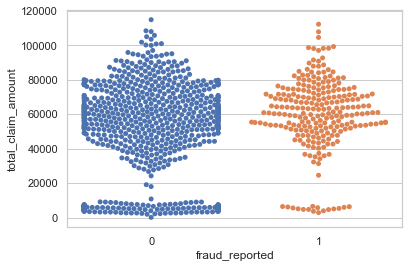

In [51]:
sns.swarmplot(x='fraud_reported', y='total_claim_amount', data= df);

Here also we can see a positive relation, as data points are getting reduced from bottom.

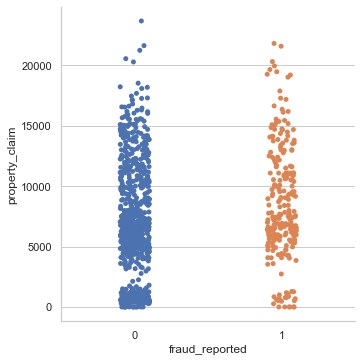

In [52]:
sns.catplot(x='fraud_reported',y='property_claim', data=df)

A little positive relation can also be seen here. 

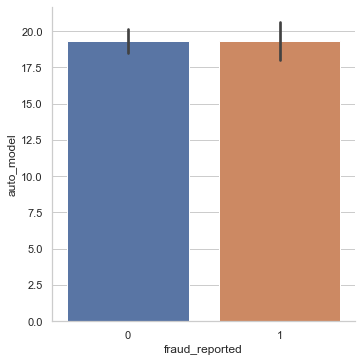

In [58]:
sns.catplot(x= 'fraud_reported',y='auto_model', data=df, kind='bar')

In this data no correlation can be seen. auto model has very little to do with fraud.

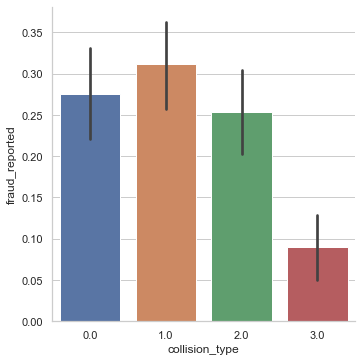

In [64]:
sns.catplot(x='collision_type', y= 'fraud_reported', data=df, kind='bar');

The graph shows that in most of the frauds, the collision is rear collision.

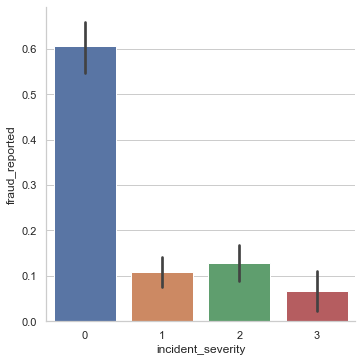

In [65]:
sns.catplot(x='incident_severity', y= 'fraud_reported', data=df, kind='bar');

Here, we can see that in majority of the yes frauds, the incident severity is 'major'.

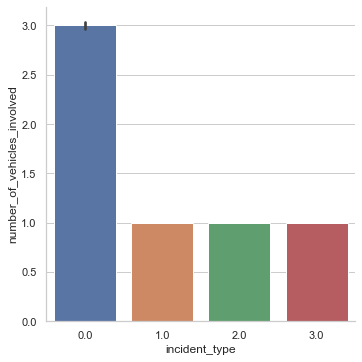

In [67]:
sns.catplot(y= 'number_of_vehicles_involved',x='incident_type', data=df, kind='bar');

The data shows the most negative correlation among the independent columns. only multiple-vehicle collision has vehicles involvement of more than one. 

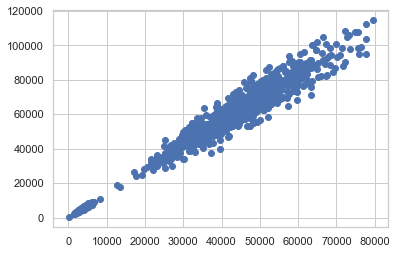

In [58]:
plt.scatter(df['vehicle_claim'],df['total_claim_amount'])
plt.show()

Here the graph shows the most positive correlation among the independent columns.

## Checking outliers

Lets check for outliers in the continious data columns.

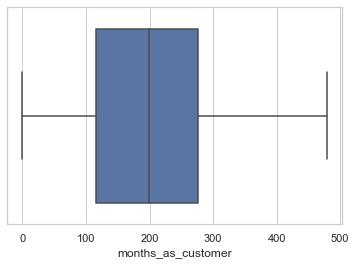

In [59]:
sns.boxplot(df['months_as_customer'])

No outliers present here.

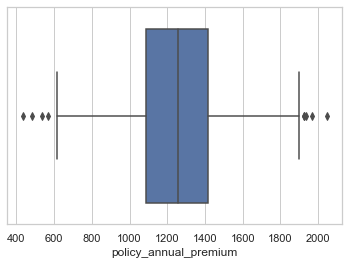

In [60]:
sns.boxplot(df['policy_annual_premium'])

Few outliers can be seen, but are very close to the threshold.

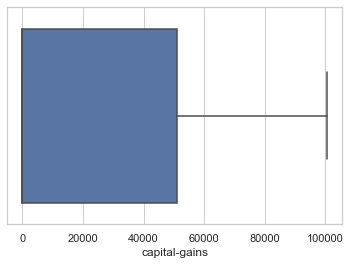

In [61]:
sns.boxplot(df['capital-gains'])

No outliers can be seen.

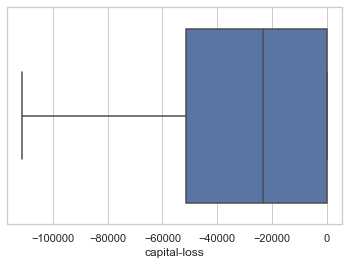

In [62]:
sns.boxplot(df['capital-loss'])

No outliers present here as well.

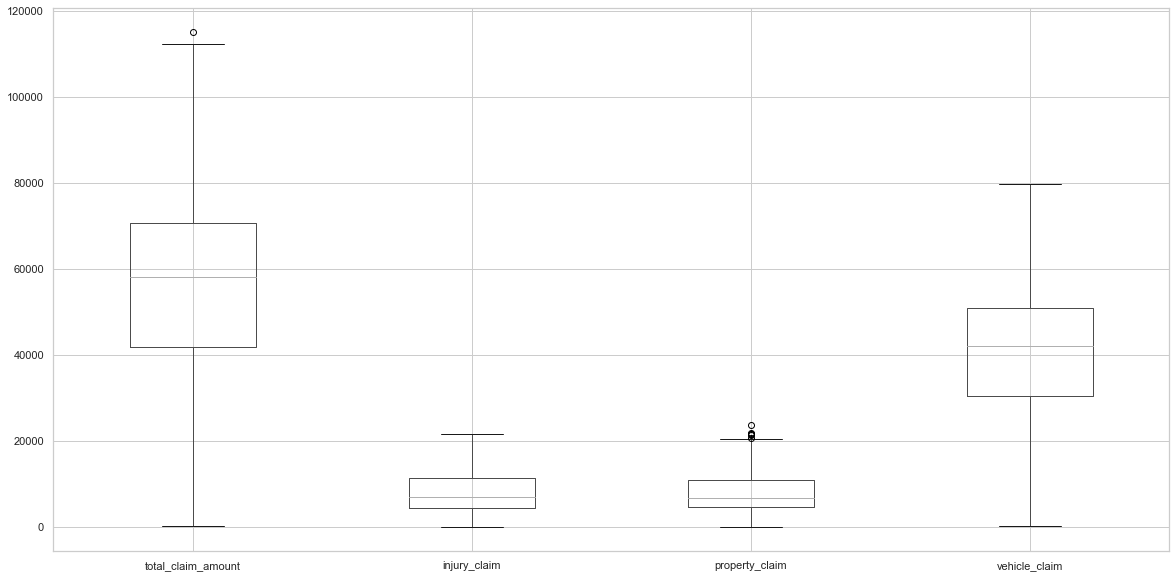

In [63]:
df.iloc[:,26:30].boxplot(figsize=[20,10])
plt.subplots_adjust()
plt.show()

Here, one outlier can be see in 'total claim' and few can be seen in 'property claim', but all are very close to the threshold.

By analysing, we can say that there are very few outliers present, and those present are very close to the threshold. so we need not remove the 
outliers, as it will also lead to dataloss.

### Checking skewness for the continious data column

In [64]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium          0.004402
umbrella_limit                 1.936066
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777
witnesses                      0.019636


Here we can see no high skewness present in the non-categorical data columns. So, we can proceed.

## Scaling

In [65]:
# Lets split the data first into x and y.

x=df.drop('fraud_reported', axis=1)
y= df['fraud_reported']

In [66]:
from sklearn.preprocessing import StandardScaler


scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.078140,0.990836,1.187173,0.060937,0.043487,0.616705,-0.469668,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.766005,0.593292,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,1.296313,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743
1,0.208995,0.334073,-0.016856,0.060937,1.285962,-0.242521,1.617746,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.691132,1.547138,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,0.045046,-1.210174,-1.338700,0.035801,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470
2,-0.608002,-1.088913,1.187173,-1.182668,1.285962,0.642233,1.617746,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-1.084249,-0.360554,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-1.206222,1.229693,1.362107,-1.198712,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702
3,0.452355,0.224613,-1.220886,0.060937,1.285962,0.652886,2.139600,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,-1.267577,0.766005,-1.314400,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,0.045046,0.009759,0.461838,-1.198712,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074
4,0.208995,0.552994,-1.220886,1.304542,0.043487,1.341980,2.139600,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,-0.683741,1.691132,1.547138,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,-1.206222,-1.210174,-0.438431,-1.198712,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,0.043487,0.222884,-0.469668,-0.928546,1.044404,-1.158316,0.576420,0.942766,-0.901927,0.953851,0.766005,-1.314400,-0.195906,-0.762060,-1.504504,0.506058,1.202666,-0.823865,1.296313,-1.210174,-0.438431,0.035801,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528
996,0.704407,0.224613,-1.220886,-1.182668,0.043487,0.739141,-0.469668,-0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,0.766005,-0.360554,-1.260614,-0.762060,0.351762,0.016640,1.634452,-0.823865,1.296313,1.229693,1.362107,0.035801,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016
997,-0.642767,-0.541611,1.187173,0.060937,-1.198989,0.520739,0.574039,-0.928546,1.044404,-1.407256,-1.186872,-0.247595,0.358023,0.953851,-1.084249,0.593292,-0.195906,1.196963,-1.504504,-1.451614,-1.100189,1.140056,0.045046,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570
998,2.208028,2.523284,-1.220886,1.304542,1.285962,0.411866,1.617746,1.076953,-1.522961,-0.411497,-1.715859,1.537947,-0.901927,0.953851,0.766005,-0.360554,-1.260614,0.543955,-1.040437,-1.451614,-1.388046,-0.823865,0.045046,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371


## Finding best random state

In [67]:
from sklearn.linear_model import LogisticRegression

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= accuracy_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.824 on random state 18


In [68]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=18)

## Model creation

In [69]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print(accuracy_score(y_test,predlr),'\n')
print(confusion_matrix(y_test,predlr),'\n')
print(classification_report(y_test,predlr),'\n')

0.824 

[[183   8]
 [ 36  23]] 

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       191
           1       0.74      0.39      0.51        59

    accuracy                           0.82       250
   macro avg       0.79      0.67      0.70       250
weighted avg       0.81      0.82      0.80       250
 



In [70]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print(accuracy_score(y_test,preddt),'\n')
print(confusion_matrix(y_test,preddt),'\n')
print(classification_report(y_test,preddt),'\n')

0.788 

[[164  27]
 [ 26  33]] 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       191
           1       0.55      0.56      0.55        59

    accuracy                           0.79       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.79      0.79      0.79       250
 



In [71]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)

print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.792 

[[179  12]
 [ 40  19]] 

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       191
           1       0.61      0.32      0.42        59

    accuracy                           0.79       250
   macro avg       0.72      0.63      0.65       250
weighted avg       0.77      0.79      0.77       250
 



In [72]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
preds= svc.predict(x_test)

print(accuracy_score(y_test,preds),'\n')
print(confusion_matrix(y_test,preds),'\n')
print(classification_report(y_test,preds),'\n')

0.772 

[[190   1]
 [ 56   3]] 

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       191
           1       0.75      0.05      0.10        59

    accuracy                           0.77       250
   macro avg       0.76      0.52      0.48       250
weighted avg       0.77      0.77      0.69       250
 



In [73]:
from sklearn.ensemble import AdaBoostClassifier

ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad= ad.predict(x_test)

print(accuracy_score(y_test,predad),'\n') 
print(confusion_matrix(y_test,predad),'\n')
print(classification_report(y_test,predad))

0.828 

[[180  11]
 [ 32  27]] 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       191
           1       0.71      0.46      0.56        59

    accuracy                           0.83       250
   macro avg       0.78      0.70      0.73       250
weighted avg       0.82      0.83      0.81       250



Here Adaboost and decision tree are giving us the best f1 score. Lets check cv score for over and under fitting.

## Cross validation

In [74]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,scoring="f1",cv=5)

print('cross validation score for logistic reg model: ', scr.mean())

cross validation score for logistic reg model:  0.4330194272473912


In [75]:
scr= cross_val_score(dt,x,y,scoring="f1",cv=5)

print('cross validation score for decision tree model: ', scr.mean())

cross validation score for decision tree model:  0.536790741107662


In [76]:
scr= cross_val_score(fr,x,y,scoring="f1",cv=5)

print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.30871134382337856


In [77]:
scr= cross_val_score(svc,x,y,scoring="f1",cv=5)

print('cross validation score for support vector classifier model: ', scr.mean())

cross validation score for support vector classifier model:  0.10243486395707942


In [78]:
scr= cross_val_score(ad,x,y,scoring="f1",cv=5)

print('cross validation score for Adaboost reg model: ', scr.mean())

cross validation score for Adaboost reg model:  0.5158274540931315


Here we can see decision tree and Adaboost are giving us the best score, and the difference between the f1 score and cv score is nearly same in both models. Lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

par1={'criterion' : ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_depth': np.arange(1,9)}

In [80]:
gcvdt= GridSearchCV(dt,par1,cv=5)
gcvdt.fit(x_train,y_train)
gcvdt.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [81]:
# Now using the above parameter which is found to be best, we create our model.

dt_model= DecisionTreeClassifier(criterion= 'gini', splitter= 'best', max_depth=3)
dt_model.fit(x_train,y_train)
predf1=dt_model.predict(x_test)

print(accuracy_score(y_test,predf1))
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1),'\n')

0.876
[[165  26]
 [  5  54]] 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       191
           1       0.68      0.92      0.78        59

    accuracy                           0.88       250
   macro avg       0.82      0.89      0.85       250
weighted avg       0.90      0.88      0.88       250
 



Using decision tree classifier, we are getting an f1 score of 91% and 78% for 0 and 1, and an accuracy score of 87%.

In [82]:
# Adaboost classifier

par2={'n_estimators':[50,100,150,200], 'algorithm' : ['SAMME', 'SAMME.R']}

gcvad= GridSearchCV(ad,par2,cv=5)
gcvad.fit(x_train,y_train)
gcvad.best_params_

{'algorithm': 'SAMME', 'n_estimators': 150}

In [86]:
# Now we create our model, using the best parameters.

ad_model= AdaBoostClassifier(n_estimators= 150, algorithm='SAMME', random_state=18)
ad_model.fit(x_train,y_train)
predf2=ad_model.predict(x_test)
print(accuracy_score(y_test,predf2))
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2),'\n')

0.84
[[180  11]
 [ 29  30]] 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       191
           1       0.73      0.51      0.60        59

    accuracy                           0.84       250
   macro avg       0.80      0.73      0.75       250
weighted avg       0.83      0.84      0.83       250
 



With Adaboost classifier, we are getting f1 score of 90% and 60% for 0 and 1, and an accuracy score of 84%

### AUC ROC Curve

In [87]:
from sklearn.metrics import plot_roc_curve

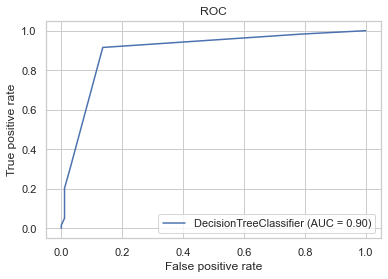

In [88]:
plot_roc_curve(dt_model,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Here we can see, with decision tree, the area under the curve is found to be 90%

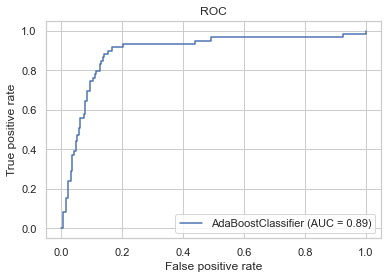

In [89]:
plot_roc_curve(ad_model,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

With AdaBoost classifier, the area under the curve is found to be 89%

By analysing both the model we have found that Decision tree classifier is giving us a higher f1 score, Also the AUC value is same in both the models, Hence we make Decision tree classifier our final model.

## Saving the model

In [90]:
import joblib

joblib.dump(ad_model,'insurance_claim.pkl')

['insurance_claim.pkl']